# Enriquecimiento de datos (data augmentation)

Existen algunos problemas de aprendizaje automático cuya dificultad radica no solo en la complejidad inherente a su naturaleza, sino también a la escasez de datos de entrenamiento y validación. El **enriquecimiento de datos** es la generación artificial de datos por medio de perturbaciones en los datos originales. Esto nos permite aumentar tanto en **tamaño** como en **diversidad** nuestro set de datos de entrenamiento.

## ¿Por qué es necesario? Clasificando perros y gatos

Para demostrar la necesidad de realizar *data agumentation* así como ilustrar los beneficios que supone su uso vamos a construir un modelo de clasificación que **distingue entre perros y gatos**. Para ello vamos a utilizar un *dataset* que se presentó como competición en la plataforma [Kaggle](https://www.kaggle.com/).

El conjunto de datos se compone de fotos de perros y gatos proporcionadas como subconjunto de fotos de un conjunto de datos mucho más amplio de 3 millones de fotos anotadas manualmente. El conjunto de datos fue desarrollado en colaboración con *Petfinder.com* y *Microsoft*.

El conjunto de datos es bastante pesado y tenemos que descargarlo desde una URL. Una vez descargado, descomprimimos el archivo.

In [5]:
!wget https://drive.upm.es/index.php/s/o5rOz4FCIEI9IO1/download -O perrosgatos.zip
!unzip perrosgatos.zip
!rm perrosgatos.zip

--2021-06-02 17:15:50--  https://drive.upm.es/index.php/s/o5rOz4FCIEI9IO1/download
Resolving drive.upm.es (drive.upm.es)... 138.100.4.11
Connecting to drive.upm.es (drive.upm.es)|138.100.4.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227806658 (217M) [application/zip]
Saving to: ‘perrosgatos.zip’

perrosgatos.zip     100%[===================>] 217.25M   107MB/s    in 2.0s    

2021-06-02 17:15:52 (107 MB/s) - ‘perrosgatos.zip’ saved [227806658/227806658]

Archive:  perrosgatos.zip
   creating: DogsCats/
   creating: DogsCats/train/
   creating: DogsCats/train/cats/
  inflating: DogsCats/train/cats/cat.1.jpg  
  inflating: DogsCats/train/cats/cat.10.jpg  
  inflating: DogsCats/train/cats/cat.100.jpg  
  inflating: DogsCats/train/cats/cat.1000.jpg  
  inflating: DogsCats/train/cats/cat.1001.jpg  
  inflating: DogsCats/train/cats/cat.1002.jpg  
  inflating: DogsCats/train/cats/cat.1003.jpg  
  inflating: DogsCats/train/cats/cat.1004.jpg  
  inflating: DogsC

  inflating: DogsCats/train/cats/cat.1218.jpg  
  inflating: DogsCats/train/cats/cat.1219.jpg  
  inflating: DogsCats/train/cats/cat.122.jpg  
  inflating: DogsCats/train/cats/cat.1220.jpg  
  inflating: DogsCats/train/cats/cat.1221.jpg  
  inflating: DogsCats/train/cats/cat.1222.jpg  
  inflating: DogsCats/train/cats/cat.1223.jpg  
  inflating: DogsCats/train/cats/cat.1224.jpg  
  inflating: DogsCats/train/cats/cat.1225.jpg  
  inflating: DogsCats/train/cats/cat.1226.jpg  
  inflating: DogsCats/train/cats/cat.1227.jpg  
  inflating: DogsCats/train/cats/cat.1228.jpg  
  inflating: DogsCats/train/cats/cat.1229.jpg  
  inflating: DogsCats/train/cats/cat.123.jpg  
  inflating: DogsCats/train/cats/cat.1230.jpg  
  inflating: DogsCats/train/cats/cat.1231.jpg  
  inflating: DogsCats/train/cats/cat.1232.jpg  
  inflating: DogsCats/train/cats/cat.1233.jpg  
  inflating: DogsCats/train/cats/cat.1234.jpg  
  inflating: DogsCats/train/cats/cat.1235.jpg  
  inflating: DogsCats/train/cats/cat.1236.

  inflating: DogsCats/train/cats/cat.1516.jpg  
  inflating: DogsCats/train/cats/cat.1517.jpg  
  inflating: DogsCats/train/cats/cat.1518.jpg  
  inflating: DogsCats/train/cats/cat.1519.jpg  
  inflating: DogsCats/train/cats/cat.152.jpg  
  inflating: DogsCats/train/cats/cat.1520.jpg  
  inflating: DogsCats/train/cats/cat.1521.jpg  
  inflating: DogsCats/train/cats/cat.1522.jpg  
  inflating: DogsCats/train/cats/cat.1523.jpg  
  inflating: DogsCats/train/cats/cat.1524.jpg  
  inflating: DogsCats/train/cats/cat.1525.jpg  
  inflating: DogsCats/train/cats/cat.1526.jpg  
  inflating: DogsCats/train/cats/cat.1527.jpg  
  inflating: DogsCats/train/cats/cat.1528.jpg  
  inflating: DogsCats/train/cats/cat.1529.jpg  
  inflating: DogsCats/train/cats/cat.153.jpg  
  inflating: DogsCats/train/cats/cat.1530.jpg  
  inflating: DogsCats/train/cats/cat.1531.jpg  
  inflating: DogsCats/train/cats/cat.1532.jpg  
  inflating: DogsCats/train/cats/cat.1533.jpg  
  inflating: DogsCats/train/cats/cat.1534.

  inflating: DogsCats/train/cats/cat.1671.jpg  
  inflating: DogsCats/train/cats/cat.1672.jpg  
  inflating: DogsCats/train/cats/cat.1673.jpg  
  inflating: DogsCats/train/cats/cat.1674.jpg  
  inflating: DogsCats/train/cats/cat.1675.jpg  
  inflating: DogsCats/train/cats/cat.1676.jpg  
  inflating: DogsCats/train/cats/cat.1677.jpg  
  inflating: DogsCats/train/cats/cat.1678.jpg  
  inflating: DogsCats/train/cats/cat.1679.jpg  
  inflating: DogsCats/train/cats/cat.168.jpg  
  inflating: DogsCats/train/cats/cat.1680.jpg  
  inflating: DogsCats/train/cats/cat.1681.jpg  
  inflating: DogsCats/train/cats/cat.1682.jpg  
  inflating: DogsCats/train/cats/cat.1683.jpg  
  inflating: DogsCats/train/cats/cat.1684.jpg  
  inflating: DogsCats/train/cats/cat.1685.jpg  
  inflating: DogsCats/train/cats/cat.1686.jpg  
  inflating: DogsCats/train/cats/cat.1687.jpg  
  inflating: DogsCats/train/cats/cat.1688.jpg  
  inflating: DogsCats/train/cats/cat.1689.jpg  
  inflating: DogsCats/train/cats/cat.169.

  inflating: DogsCats/train/cats/cat.1972.jpg  
  inflating: DogsCats/train/cats/cat.1973.jpg  
  inflating: DogsCats/train/cats/cat.1974.jpg  
  inflating: DogsCats/train/cats/cat.1975.jpg  
  inflating: DogsCats/train/cats/cat.1976.jpg  
  inflating: DogsCats/train/cats/cat.1977.jpg  
  inflating: DogsCats/train/cats/cat.1978.jpg  
  inflating: DogsCats/train/cats/cat.1979.jpg  
  inflating: DogsCats/train/cats/cat.198.jpg  
  inflating: DogsCats/train/cats/cat.1980.jpg  
  inflating: DogsCats/train/cats/cat.1981.jpg  
  inflating: DogsCats/train/cats/cat.1982.jpg  
  inflating: DogsCats/train/cats/cat.1983.jpg  
  inflating: DogsCats/train/cats/cat.1984.jpg  
  inflating: DogsCats/train/cats/cat.1985.jpg  
  inflating: DogsCats/train/cats/cat.1986.jpg  
  inflating: DogsCats/train/cats/cat.1987.jpg  
  inflating: DogsCats/train/cats/cat.1988.jpg  
  inflating: DogsCats/train/cats/cat.1989.jpg  
  inflating: DogsCats/train/cats/cat.199.jpg  
  inflating: DogsCats/train/cats/cat.1990.

  inflating: DogsCats/train/cats/cat.2126.jpg  
  inflating: DogsCats/train/cats/cat.2127.jpg  
  inflating: DogsCats/train/cats/cat.2128.jpg  
  inflating: DogsCats/train/cats/cat.2129.jpg  
  inflating: DogsCats/train/cats/cat.213.jpg  
  inflating: DogsCats/train/cats/cat.2130.jpg  
  inflating: DogsCats/train/cats/cat.2131.jpg  
  inflating: DogsCats/train/cats/cat.2132.jpg  
  inflating: DogsCats/train/cats/cat.2133.jpg  
  inflating: DogsCats/train/cats/cat.2134.jpg  
  inflating: DogsCats/train/cats/cat.2135.jpg  
  inflating: DogsCats/train/cats/cat.2136.jpg  
  inflating: DogsCats/train/cats/cat.2137.jpg  
  inflating: DogsCats/train/cats/cat.2138.jpg  
  inflating: DogsCats/train/cats/cat.2139.jpg  
  inflating: DogsCats/train/cats/cat.214.jpg  
  inflating: DogsCats/train/cats/cat.2140.jpg  
  inflating: DogsCats/train/cats/cat.2141.jpg  
  inflating: DogsCats/train/cats/cat.2142.jpg  
  inflating: DogsCats/train/cats/cat.2143.jpg  
  inflating: DogsCats/train/cats/cat.2144.

  inflating: DogsCats/train/cats/cat.2425.jpg  
  inflating: DogsCats/train/cats/cat.2426.jpg  
  inflating: DogsCats/train/cats/cat.2427.jpg  
  inflating: DogsCats/train/cats/cat.2428.jpg  
  inflating: DogsCats/train/cats/cat.2429.jpg  
  inflating: DogsCats/train/cats/cat.243.jpg  
  inflating: DogsCats/train/cats/cat.2430.jpg  
  inflating: DogsCats/train/cats/cat.2431.jpg  
  inflating: DogsCats/train/cats/cat.2432.jpg  
  inflating: DogsCats/train/cats/cat.2433.jpg  
  inflating: DogsCats/train/cats/cat.2434.jpg  
  inflating: DogsCats/train/cats/cat.2435.jpg  
  inflating: DogsCats/train/cats/cat.2436.jpg  
  inflating: DogsCats/train/cats/cat.2437.jpg  
  inflating: DogsCats/train/cats/cat.2438.jpg  
  inflating: DogsCats/train/cats/cat.2439.jpg  
  inflating: DogsCats/train/cats/cat.244.jpg  
  inflating: DogsCats/train/cats/cat.2440.jpg  
  inflating: DogsCats/train/cats/cat.2441.jpg  
  inflating: DogsCats/train/cats/cat.2442.jpg  
  inflating: DogsCats/train/cats/cat.2443.

  inflating: DogsCats/train/cats/cat.2581.jpg  
  inflating: DogsCats/train/cats/cat.2582.jpg  
  inflating: DogsCats/train/cats/cat.2583.jpg  
  inflating: DogsCats/train/cats/cat.2584.jpg  
  inflating: DogsCats/train/cats/cat.2585.jpg  
  inflating: DogsCats/train/cats/cat.2586.jpg  
  inflating: DogsCats/train/cats/cat.2587.jpg  
  inflating: DogsCats/train/cats/cat.2588.jpg  
  inflating: DogsCats/train/cats/cat.2589.jpg  
  inflating: DogsCats/train/cats/cat.259.jpg  
  inflating: DogsCats/train/cats/cat.2590.jpg  
  inflating: DogsCats/train/cats/cat.2591.jpg  
  inflating: DogsCats/train/cats/cat.2592.jpg  
  inflating: DogsCats/train/cats/cat.2593.jpg  
  inflating: DogsCats/train/cats/cat.2594.jpg  
  inflating: DogsCats/train/cats/cat.2595.jpg  
  inflating: DogsCats/train/cats/cat.2596.jpg  
  inflating: DogsCats/train/cats/cat.2597.jpg  
  inflating: DogsCats/train/cats/cat.2598.jpg  
  inflating: DogsCats/train/cats/cat.2599.jpg  
  inflating: DogsCats/train/cats/cat.26.j

  inflating: DogsCats/train/cats/cat.2741.jpg  
  inflating: DogsCats/train/cats/cat.2742.jpg  
  inflating: DogsCats/train/cats/cat.2743.jpg  
  inflating: DogsCats/train/cats/cat.2744.jpg  
  inflating: DogsCats/train/cats/cat.2745.jpg  
  inflating: DogsCats/train/cats/cat.2746.jpg  
  inflating: DogsCats/train/cats/cat.2747.jpg  
  inflating: DogsCats/train/cats/cat.2748.jpg  
  inflating: DogsCats/train/cats/cat.2749.jpg  
  inflating: DogsCats/train/cats/cat.275.jpg  
  inflating: DogsCats/train/cats/cat.2750.jpg  
  inflating: DogsCats/train/cats/cat.2751.jpg  
  inflating: DogsCats/train/cats/cat.2752.jpg  
  inflating: DogsCats/train/cats/cat.2753.jpg  
  inflating: DogsCats/train/cats/cat.2754.jpg  
  inflating: DogsCats/train/cats/cat.2755.jpg  
  inflating: DogsCats/train/cats/cat.2756.jpg  
  inflating: DogsCats/train/cats/cat.2757.jpg  
  inflating: DogsCats/train/cats/cat.2758.jpg  
  inflating: DogsCats/train/cats/cat.2759.jpg  
  inflating: DogsCats/train/cats/cat.276.

  inflating: DogsCats/train/cats/cat.3039.jpg  
  inflating: DogsCats/train/cats/cat.304.jpg  
  inflating: DogsCats/train/cats/cat.3040.jpg  
  inflating: DogsCats/train/cats/cat.3041.jpg  
  inflating: DogsCats/train/cats/cat.3042.jpg  
  inflating: DogsCats/train/cats/cat.3043.jpg  
  inflating: DogsCats/train/cats/cat.3044.jpg  
  inflating: DogsCats/train/cats/cat.3045.jpg  
  inflating: DogsCats/train/cats/cat.3046.jpg  
  inflating: DogsCats/train/cats/cat.3047.jpg  
  inflating: DogsCats/train/cats/cat.3048.jpg  
  inflating: DogsCats/train/cats/cat.3049.jpg  
  inflating: DogsCats/train/cats/cat.305.jpg  
  inflating: DogsCats/train/cats/cat.3050.jpg  
  inflating: DogsCats/train/cats/cat.3051.jpg  
  inflating: DogsCats/train/cats/cat.3052.jpg  
  inflating: DogsCats/train/cats/cat.3053.jpg  
  inflating: DogsCats/train/cats/cat.3054.jpg  
  inflating: DogsCats/train/cats/cat.3055.jpg  
  inflating: DogsCats/train/cats/cat.3056.jpg  
  inflating: DogsCats/train/cats/cat.3057.

  inflating: DogsCats/train/cats/cat.3331.jpg  
  inflating: DogsCats/train/cats/cat.3332.jpg  
  inflating: DogsCats/train/cats/cat.3333.jpg  
  inflating: DogsCats/train/cats/cat.3334.jpg  
  inflating: DogsCats/train/cats/cat.3335.jpg  
  inflating: DogsCats/train/cats/cat.3336.jpg  
  inflating: DogsCats/train/cats/cat.3337.jpg  
  inflating: DogsCats/train/cats/cat.3338.jpg  
  inflating: DogsCats/train/cats/cat.3339.jpg  
  inflating: DogsCats/train/cats/cat.334.jpg  
  inflating: DogsCats/train/cats/cat.3340.jpg  
  inflating: DogsCats/train/cats/cat.3341.jpg  
  inflating: DogsCats/train/cats/cat.3342.jpg  
  inflating: DogsCats/train/cats/cat.3343.jpg  
  inflating: DogsCats/train/cats/cat.3344.jpg  
  inflating: DogsCats/train/cats/cat.3345.jpg  
  inflating: DogsCats/train/cats/cat.3346.jpg  
  inflating: DogsCats/train/cats/cat.3347.jpg  
  inflating: DogsCats/train/cats/cat.3348.jpg  
  inflating: DogsCats/train/cats/cat.3349.jpg  
  inflating: DogsCats/train/cats/cat.335.

  inflating: DogsCats/train/cats/cat.3627.jpg  
  inflating: DogsCats/train/cats/cat.3628.jpg  
  inflating: DogsCats/train/cats/cat.3629.jpg  
  inflating: DogsCats/train/cats/cat.363.jpg  
  inflating: DogsCats/train/cats/cat.3630.jpg  
  inflating: DogsCats/train/cats/cat.3631.jpg  
  inflating: DogsCats/train/cats/cat.3632.jpg  
  inflating: DogsCats/train/cats/cat.3633.jpg  
  inflating: DogsCats/train/cats/cat.3634.jpg  
  inflating: DogsCats/train/cats/cat.3635.jpg  
  inflating: DogsCats/train/cats/cat.3636.jpg  
  inflating: DogsCats/train/cats/cat.3637.jpg  
  inflating: DogsCats/train/cats/cat.3638.jpg  
  inflating: DogsCats/train/cats/cat.3639.jpg  
  inflating: DogsCats/train/cats/cat.364.jpg  
  inflating: DogsCats/train/cats/cat.3640.jpg  
  inflating: DogsCats/train/cats/cat.3641.jpg  
  inflating: DogsCats/train/cats/cat.3642.jpg  
  inflating: DogsCats/train/cats/cat.3643.jpg  
  inflating: DogsCats/train/cats/cat.3644.jpg  
  inflating: DogsCats/train/cats/cat.3645.

  inflating: DogsCats/train/cats/cat.3928.jpg  
  inflating: DogsCats/train/cats/cat.3929.jpg  
  inflating: DogsCats/train/cats/cat.393.jpg  
  inflating: DogsCats/train/cats/cat.3930.jpg  
  inflating: DogsCats/train/cats/cat.3931.jpg  
  inflating: DogsCats/train/cats/cat.3932.jpg  
  inflating: DogsCats/train/cats/cat.3933.jpg  
  inflating: DogsCats/train/cats/cat.3934.jpg  
  inflating: DogsCats/train/cats/cat.3935.jpg  
  inflating: DogsCats/train/cats/cat.3936.jpg  
  inflating: DogsCats/train/cats/cat.3937.jpg  
  inflating: DogsCats/train/cats/cat.3938.jpg  
  inflating: DogsCats/train/cats/cat.3939.jpg  
  inflating: DogsCats/train/cats/cat.394.jpg  
  inflating: DogsCats/train/cats/cat.3940.jpg  
  inflating: DogsCats/train/cats/cat.3941.jpg  
  inflating: DogsCats/train/cats/cat.3942.jpg  
  inflating: DogsCats/train/cats/cat.3943.jpg  
  inflating: DogsCats/train/cats/cat.3944.jpg  
  inflating: DogsCats/train/cats/cat.3945.jpg  
  inflating: DogsCats/train/cats/cat.3946.

  inflating: DogsCats/train/cats/cat.620.jpg  
  inflating: DogsCats/train/cats/cat.621.jpg  
  inflating: DogsCats/train/cats/cat.622.jpg  
  inflating: DogsCats/train/cats/cat.623.jpg  
  inflating: DogsCats/train/cats/cat.624.jpg  
  inflating: DogsCats/train/cats/cat.625.jpg  
  inflating: DogsCats/train/cats/cat.626.jpg  
  inflating: DogsCats/train/cats/cat.627.jpg  
  inflating: DogsCats/train/cats/cat.628.jpg  
  inflating: DogsCats/train/cats/cat.629.jpg  
  inflating: DogsCats/train/cats/cat.63.jpg  
  inflating: DogsCats/train/cats/cat.630.jpg  
  inflating: DogsCats/train/cats/cat.631.jpg  
  inflating: DogsCats/train/cats/cat.632.jpg  
  inflating: DogsCats/train/cats/cat.633.jpg  
  inflating: DogsCats/train/cats/cat.634.jpg  
  inflating: DogsCats/train/cats/cat.635.jpg  
  inflating: DogsCats/train/cats/cat.636.jpg  
  inflating: DogsCats/train/cats/cat.637.jpg  
  inflating: DogsCats/train/cats/cat.638.jpg  
  inflating: DogsCats/train/cats/cat.639.jpg  
  inflating: D

  inflating: DogsCats/train/cats/cat.911.jpg  
  inflating: DogsCats/train/cats/cat.912.jpg  
  inflating: DogsCats/train/cats/cat.913.jpg  
  inflating: DogsCats/train/cats/cat.914.jpg  
  inflating: DogsCats/train/cats/cat.915.jpg  
  inflating: DogsCats/train/cats/cat.916.jpg  
  inflating: DogsCats/train/cats/cat.917.jpg  
  inflating: DogsCats/train/cats/cat.918.jpg  
  inflating: DogsCats/train/cats/cat.919.jpg  
  inflating: DogsCats/train/cats/cat.92.jpg  
  inflating: DogsCats/train/cats/cat.920.jpg  
  inflating: DogsCats/train/cats/cat.921.jpg  
  inflating: DogsCats/train/cats/cat.922.jpg  
  inflating: DogsCats/train/cats/cat.923.jpg  
  inflating: DogsCats/train/cats/cat.924.jpg  
  inflating: DogsCats/train/cats/cat.925.jpg  
  inflating: DogsCats/train/cats/cat.926.jpg  
  inflating: DogsCats/train/cats/cat.927.jpg  
  inflating: DogsCats/train/cats/cat.928.jpg  
  inflating: DogsCats/train/cats/cat.929.jpg  
  inflating: DogsCats/train/cats/cat.93.jpg  
  inflating: Do

  inflating: DogsCats/train/dogs/dog.1184.jpg  
  inflating: DogsCats/train/dogs/dog.1185.jpg  
  inflating: DogsCats/train/dogs/dog.1186.jpg  
  inflating: DogsCats/train/dogs/dog.1187.jpg  
  inflating: DogsCats/train/dogs/dog.1188.jpg  
  inflating: DogsCats/train/dogs/dog.1189.jpg  
  inflating: DogsCats/train/dogs/dog.119.jpg  
  inflating: DogsCats/train/dogs/dog.1190.jpg  
  inflating: DogsCats/train/dogs/dog.1191.jpg  
  inflating: DogsCats/train/dogs/dog.1192.jpg  
  inflating: DogsCats/train/dogs/dog.1193.jpg  
  inflating: DogsCats/train/dogs/dog.1194.jpg  
  inflating: DogsCats/train/dogs/dog.1195.jpg  
  inflating: DogsCats/train/dogs/dog.1196.jpg  
  inflating: DogsCats/train/dogs/dog.1197.jpg  
  inflating: DogsCats/train/dogs/dog.1198.jpg  
  inflating: DogsCats/train/dogs/dog.1199.jpg  
  inflating: DogsCats/train/dogs/dog.12.jpg  
  inflating: DogsCats/train/dogs/dog.120.jpg  
  inflating: DogsCats/train/dogs/dog.1200.jpg  
  inflating: DogsCats/train/dogs/dog.1201.jp

  inflating: DogsCats/train/dogs/dog.1458.jpg  
  inflating: DogsCats/train/dogs/dog.1459.jpg  
  inflating: DogsCats/train/dogs/dog.146.jpg  
  inflating: DogsCats/train/dogs/dog.1460.jpg  
  inflating: DogsCats/train/dogs/dog.1461.jpg  
  inflating: DogsCats/train/dogs/dog.1462.jpg  
  inflating: DogsCats/train/dogs/dog.1463.jpg  
  inflating: DogsCats/train/dogs/dog.1464.jpg  
  inflating: DogsCats/train/dogs/dog.1465.jpg  
  inflating: DogsCats/train/dogs/dog.1466.jpg  
  inflating: DogsCats/train/dogs/dog.1467.jpg  
  inflating: DogsCats/train/dogs/dog.1468.jpg  
  inflating: DogsCats/train/dogs/dog.1469.jpg  
  inflating: DogsCats/train/dogs/dog.147.jpg  
  inflating: DogsCats/train/dogs/dog.1470.jpg  
  inflating: DogsCats/train/dogs/dog.1471.jpg  
  inflating: DogsCats/train/dogs/dog.1472.jpg  
  inflating: DogsCats/train/dogs/dog.1473.jpg  
  inflating: DogsCats/train/dogs/dog.1474.jpg  
  inflating: DogsCats/train/dogs/dog.1475.jpg  
  inflating: DogsCats/train/dogs/dog.1476.

  inflating: DogsCats/train/dogs/dog.173.jpg  
  inflating: DogsCats/train/dogs/dog.1730.jpg  
  inflating: DogsCats/train/dogs/dog.1731.jpg  
  inflating: DogsCats/train/dogs/dog.1732.jpg  
  inflating: DogsCats/train/dogs/dog.1733.jpg  
  inflating: DogsCats/train/dogs/dog.1734.jpg  
  inflating: DogsCats/train/dogs/dog.1735.jpg  
  inflating: DogsCats/train/dogs/dog.1736.jpg  
  inflating: DogsCats/train/dogs/dog.1737.jpg  
  inflating: DogsCats/train/dogs/dog.1738.jpg  
  inflating: DogsCats/train/dogs/dog.1739.jpg  
  inflating: DogsCats/train/dogs/dog.174.jpg  
  inflating: DogsCats/train/dogs/dog.1740.jpg  
  inflating: DogsCats/train/dogs/dog.1741.jpg  
  inflating: DogsCats/train/dogs/dog.1742.jpg  
  inflating: DogsCats/train/dogs/dog.1743.jpg  
  inflating: DogsCats/train/dogs/dog.1744.jpg  
  inflating: DogsCats/train/dogs/dog.1745.jpg  
  inflating: DogsCats/train/dogs/dog.1746.jpg  
  inflating: DogsCats/train/dogs/dog.1747.jpg  
  inflating: DogsCats/train/dogs/dog.1748.

  inflating: DogsCats/train/dogs/dog.2003.jpg  
  inflating: DogsCats/train/dogs/dog.2004.jpg  
  inflating: DogsCats/train/dogs/dog.2005.jpg  
  inflating: DogsCats/train/dogs/dog.2006.jpg  
  inflating: DogsCats/train/dogs/dog.2007.jpg  
  inflating: DogsCats/train/dogs/dog.2008.jpg  
  inflating: DogsCats/train/dogs/dog.2009.jpg  
  inflating: DogsCats/train/dogs/dog.201.jpg  
  inflating: DogsCats/train/dogs/dog.2010.jpg  
  inflating: DogsCats/train/dogs/dog.2011.jpg  
  inflating: DogsCats/train/dogs/dog.2012.jpg  
  inflating: DogsCats/train/dogs/dog.2013.jpg  
  inflating: DogsCats/train/dogs/dog.2014.jpg  
  inflating: DogsCats/train/dogs/dog.2015.jpg  
  inflating: DogsCats/train/dogs/dog.2016.jpg  
  inflating: DogsCats/train/dogs/dog.2017.jpg  
  inflating: DogsCats/train/dogs/dog.2018.jpg  
  inflating: DogsCats/train/dogs/dog.2019.jpg  
  inflating: DogsCats/train/dogs/dog.202.jpg  
  inflating: DogsCats/train/dogs/dog.2020.jpg  
  inflating: DogsCats/train/dogs/dog.2021.

  inflating: DogsCats/train/dogs/dog.227.jpg  
  inflating: DogsCats/train/dogs/dog.2270.jpg  
  inflating: DogsCats/train/dogs/dog.2271.jpg  
  inflating: DogsCats/train/dogs/dog.2272.jpg  
  inflating: DogsCats/train/dogs/dog.2273.jpg  
  inflating: DogsCats/train/dogs/dog.2274.jpg  
  inflating: DogsCats/train/dogs/dog.2275.jpg  
  inflating: DogsCats/train/dogs/dog.2276.jpg  
  inflating: DogsCats/train/dogs/dog.2277.jpg  
  inflating: DogsCats/train/dogs/dog.2278.jpg  
  inflating: DogsCats/train/dogs/dog.2279.jpg  
  inflating: DogsCats/train/dogs/dog.228.jpg  
  inflating: DogsCats/train/dogs/dog.2280.jpg  
  inflating: DogsCats/train/dogs/dog.2281.jpg  
  inflating: DogsCats/train/dogs/dog.2282.jpg  
  inflating: DogsCats/train/dogs/dog.2283.jpg  
  inflating: DogsCats/train/dogs/dog.2284.jpg  
  inflating: DogsCats/train/dogs/dog.2285.jpg  
  inflating: DogsCats/train/dogs/dog.2286.jpg  
  inflating: DogsCats/train/dogs/dog.2287.jpg  
  inflating: DogsCats/train/dogs/dog.2288.

  inflating: DogsCats/train/dogs/dog.2535.jpg  
  inflating: DogsCats/train/dogs/dog.2536.jpg  
  inflating: DogsCats/train/dogs/dog.2537.jpg  
  inflating: DogsCats/train/dogs/dog.2538.jpg  
  inflating: DogsCats/train/dogs/dog.2539.jpg  
  inflating: DogsCats/train/dogs/dog.254.jpg  
  inflating: DogsCats/train/dogs/dog.2540.jpg  
  inflating: DogsCats/train/dogs/dog.2541.jpg  
  inflating: DogsCats/train/dogs/dog.2542.jpg  
  inflating: DogsCats/train/dogs/dog.2543.jpg  
  inflating: DogsCats/train/dogs/dog.2544.jpg  
  inflating: DogsCats/train/dogs/dog.2545.jpg  
  inflating: DogsCats/train/dogs/dog.2546.jpg  
  inflating: DogsCats/train/dogs/dog.2547.jpg  
  inflating: DogsCats/train/dogs/dog.2548.jpg  
  inflating: DogsCats/train/dogs/dog.2549.jpg  
  inflating: DogsCats/train/dogs/dog.255.jpg  
  inflating: DogsCats/train/dogs/dog.2550.jpg  
  inflating: DogsCats/train/dogs/dog.2551.jpg  
  inflating: DogsCats/train/dogs/dog.2552.jpg  
  inflating: DogsCats/train/dogs/dog.2553.

  inflating: DogsCats/train/dogs/dog.2801.jpg  
  inflating: DogsCats/train/dogs/dog.2802.jpg  
  inflating: DogsCats/train/dogs/dog.2803.jpg  
  inflating: DogsCats/train/dogs/dog.2804.jpg  
  inflating: DogsCats/train/dogs/dog.2805.jpg  
  inflating: DogsCats/train/dogs/dog.2806.jpg  
  inflating: DogsCats/train/dogs/dog.2807.jpg  
  inflating: DogsCats/train/dogs/dog.2808.jpg  
  inflating: DogsCats/train/dogs/dog.2809.jpg  
  inflating: DogsCats/train/dogs/dog.281.jpg  
  inflating: DogsCats/train/dogs/dog.2810.jpg  
  inflating: DogsCats/train/dogs/dog.2811.jpg  
  inflating: DogsCats/train/dogs/dog.2812.jpg  
  inflating: DogsCats/train/dogs/dog.2813.jpg  
  inflating: DogsCats/train/dogs/dog.2814.jpg  
  inflating: DogsCats/train/dogs/dog.2815.jpg  
  inflating: DogsCats/train/dogs/dog.2816.jpg  
  inflating: DogsCats/train/dogs/dog.2817.jpg  
  inflating: DogsCats/train/dogs/dog.2818.jpg  
  inflating: DogsCats/train/dogs/dog.2819.jpg  
  inflating: DogsCats/train/dogs/dog.282.

  inflating: DogsCats/train/dogs/dog.3074.jpg  
  inflating: DogsCats/train/dogs/dog.3075.jpg  
  inflating: DogsCats/train/dogs/dog.3076.jpg  
  inflating: DogsCats/train/dogs/dog.3077.jpg  
  inflating: DogsCats/train/dogs/dog.3078.jpg  
  inflating: DogsCats/train/dogs/dog.3079.jpg  
  inflating: DogsCats/train/dogs/dog.308.jpg  
  inflating: DogsCats/train/dogs/dog.3080.jpg  
  inflating: DogsCats/train/dogs/dog.3081.jpg  
  inflating: DogsCats/train/dogs/dog.3082.jpg  
  inflating: DogsCats/train/dogs/dog.3083.jpg  
  inflating: DogsCats/train/dogs/dog.3084.jpg  
  inflating: DogsCats/train/dogs/dog.3085.jpg  
  inflating: DogsCats/train/dogs/dog.3086.jpg  
  inflating: DogsCats/train/dogs/dog.3087.jpg  
  inflating: DogsCats/train/dogs/dog.3088.jpg  
  inflating: DogsCats/train/dogs/dog.3089.jpg  
  inflating: DogsCats/train/dogs/dog.309.jpg  
  inflating: DogsCats/train/dogs/dog.3090.jpg  
  inflating: DogsCats/train/dogs/dog.3091.jpg  
  inflating: DogsCats/train/dogs/dog.3092.

  inflating: DogsCats/train/dogs/dog.3340.jpg  
  inflating: DogsCats/train/dogs/dog.3341.jpg  
  inflating: DogsCats/train/dogs/dog.3342.jpg  
  inflating: DogsCats/train/dogs/dog.3343.jpg  
  inflating: DogsCats/train/dogs/dog.3344.jpg  
  inflating: DogsCats/train/dogs/dog.3345.jpg  
  inflating: DogsCats/train/dogs/dog.3346.jpg  
  inflating: DogsCats/train/dogs/dog.3347.jpg  
  inflating: DogsCats/train/dogs/dog.3348.jpg  
  inflating: DogsCats/train/dogs/dog.3349.jpg  
  inflating: DogsCats/train/dogs/dog.335.jpg  
  inflating: DogsCats/train/dogs/dog.3350.jpg  
  inflating: DogsCats/train/dogs/dog.3351.jpg  
  inflating: DogsCats/train/dogs/dog.3352.jpg  
  inflating: DogsCats/train/dogs/dog.3353.jpg  
  inflating: DogsCats/train/dogs/dog.3354.jpg  
  inflating: DogsCats/train/dogs/dog.3355.jpg  
  inflating: DogsCats/train/dogs/dog.3356.jpg  
  inflating: DogsCats/train/dogs/dog.3357.jpg  
  inflating: DogsCats/train/dogs/dog.3358.jpg  
  inflating: DogsCats/train/dogs/dog.3359

  inflating: DogsCats/train/dogs/dog.361.jpg  
  inflating: DogsCats/train/dogs/dog.3610.jpg  
  inflating: DogsCats/train/dogs/dog.3611.jpg  
  inflating: DogsCats/train/dogs/dog.3612.jpg  
  inflating: DogsCats/train/dogs/dog.3613.jpg  
  inflating: DogsCats/train/dogs/dog.3614.jpg  
  inflating: DogsCats/train/dogs/dog.3615.jpg  
  inflating: DogsCats/train/dogs/dog.3616.jpg  
  inflating: DogsCats/train/dogs/dog.3617.jpg  
  inflating: DogsCats/train/dogs/dog.3618.jpg  
  inflating: DogsCats/train/dogs/dog.3619.jpg  
  inflating: DogsCats/train/dogs/dog.362.jpg  
  inflating: DogsCats/train/dogs/dog.3620.jpg  
  inflating: DogsCats/train/dogs/dog.3621.jpg  
  inflating: DogsCats/train/dogs/dog.3622.jpg  
  inflating: DogsCats/train/dogs/dog.3623.jpg  
  inflating: DogsCats/train/dogs/dog.3624.jpg  
  inflating: DogsCats/train/dogs/dog.3625.jpg  
  inflating: DogsCats/train/dogs/dog.3626.jpg  
  inflating: DogsCats/train/dogs/dog.3627.jpg  
  inflating: DogsCats/train/dogs/dog.3628.

  inflating: DogsCats/train/dogs/dog.3877.jpg  
  inflating: DogsCats/train/dogs/dog.3878.jpg  
  inflating: DogsCats/train/dogs/dog.3879.jpg  
  inflating: DogsCats/train/dogs/dog.388.jpg  
  inflating: DogsCats/train/dogs/dog.3880.jpg  
  inflating: DogsCats/train/dogs/dog.3881.jpg  
  inflating: DogsCats/train/dogs/dog.3882.jpg  
  inflating: DogsCats/train/dogs/dog.3883.jpg  
  inflating: DogsCats/train/dogs/dog.3884.jpg  
  inflating: DogsCats/train/dogs/dog.3885.jpg  
  inflating: DogsCats/train/dogs/dog.3886.jpg  
  inflating: DogsCats/train/dogs/dog.3887.jpg  
  inflating: DogsCats/train/dogs/dog.3888.jpg  
  inflating: DogsCats/train/dogs/dog.3889.jpg  
  inflating: DogsCats/train/dogs/dog.389.jpg  
  inflating: DogsCats/train/dogs/dog.3890.jpg  
  inflating: DogsCats/train/dogs/dog.3891.jpg  
  inflating: DogsCats/train/dogs/dog.3892.jpg  
  inflating: DogsCats/train/dogs/dog.3893.jpg  
  inflating: DogsCats/train/dogs/dog.3894.jpg  
  inflating: DogsCats/train/dogs/dog.3895.

  inflating: DogsCats/train/dogs/dog.544.jpg  
  inflating: DogsCats/train/dogs/dog.545.jpg  
  inflating: DogsCats/train/dogs/dog.546.jpg  
  inflating: DogsCats/train/dogs/dog.547.jpg  
  inflating: DogsCats/train/dogs/dog.548.jpg  
  inflating: DogsCats/train/dogs/dog.549.jpg  
  inflating: DogsCats/train/dogs/dog.55.jpg  
  inflating: DogsCats/train/dogs/dog.550.jpg  
  inflating: DogsCats/train/dogs/dog.551.jpg  
  inflating: DogsCats/train/dogs/dog.552.jpg  
  inflating: DogsCats/train/dogs/dog.553.jpg  
  inflating: DogsCats/train/dogs/dog.554.jpg  
  inflating: DogsCats/train/dogs/dog.555.jpg  
  inflating: DogsCats/train/dogs/dog.556.jpg  
  inflating: DogsCats/train/dogs/dog.557.jpg  
  inflating: DogsCats/train/dogs/dog.558.jpg  
  inflating: DogsCats/train/dogs/dog.559.jpg  
  inflating: DogsCats/train/dogs/dog.56.jpg  
  inflating: DogsCats/train/dogs/dog.560.jpg  
  inflating: DogsCats/train/dogs/dog.561.jpg  
  inflating: DogsCats/train/dogs/dog.562.jpg  
  inflating: Do

  inflating: DogsCats/train/dogs/dog.816.jpg  
  inflating: DogsCats/train/dogs/dog.817.jpg  
  inflating: DogsCats/train/dogs/dog.818.jpg  
  inflating: DogsCats/train/dogs/dog.819.jpg  
  inflating: DogsCats/train/dogs/dog.82.jpg  
  inflating: DogsCats/train/dogs/dog.820.jpg  
  inflating: DogsCats/train/dogs/dog.821.jpg  
  inflating: DogsCats/train/dogs/dog.822.jpg  
  inflating: DogsCats/train/dogs/dog.823.jpg  
  inflating: DogsCats/train/dogs/dog.824.jpg  
  inflating: DogsCats/train/dogs/dog.825.jpg  
  inflating: DogsCats/train/dogs/dog.826.jpg  
  inflating: DogsCats/train/dogs/dog.827.jpg  
  inflating: DogsCats/train/dogs/dog.828.jpg  
  inflating: DogsCats/train/dogs/dog.829.jpg  
  inflating: DogsCats/train/dogs/dog.83.jpg  
  inflating: DogsCats/train/dogs/dog.830.jpg  
  inflating: DogsCats/train/dogs/dog.831.jpg  
  inflating: DogsCats/train/dogs/dog.832.jpg  
  inflating: DogsCats/train/dogs/dog.833.jpg  
  inflating: DogsCats/train/dogs/dog.834.jpg  
  inflating: Do

  inflating: DogsCats/validation/cats/cat.4108.jpg  
  inflating: DogsCats/validation/cats/cat.4109.jpg  
  inflating: DogsCats/validation/cats/cat.4110.jpg  
  inflating: DogsCats/validation/cats/cat.4111.jpg  
  inflating: DogsCats/validation/cats/cat.4112.jpg  
  inflating: DogsCats/validation/cats/cat.4113.jpg  
  inflating: DogsCats/validation/cats/cat.4114.jpg  
  inflating: DogsCats/validation/cats/cat.4115.jpg  
  inflating: DogsCats/validation/cats/cat.4116.jpg  
  inflating: DogsCats/validation/cats/cat.4117.jpg  
  inflating: DogsCats/validation/cats/cat.4118.jpg  
  inflating: DogsCats/validation/cats/cat.4119.jpg  
  inflating: DogsCats/validation/cats/cat.4120.jpg  
  inflating: DogsCats/validation/cats/cat.4121.jpg  
  inflating: DogsCats/validation/cats/cat.4122.jpg  
  inflating: DogsCats/validation/cats/cat.4123.jpg  
  inflating: DogsCats/validation/cats/cat.4124.jpg  
  inflating: DogsCats/validation/cats/cat.4125.jpg  
  inflating: DogsCats/validation/cats/cat.4126

  inflating: DogsCats/validation/cats/cat.4268.jpg  
  inflating: DogsCats/validation/cats/cat.4269.jpg  
  inflating: DogsCats/validation/cats/cat.4270.jpg  
  inflating: DogsCats/validation/cats/cat.4271.jpg  
  inflating: DogsCats/validation/cats/cat.4272.jpg  
  inflating: DogsCats/validation/cats/cat.4273.jpg  
  inflating: DogsCats/validation/cats/cat.4274.jpg  
  inflating: DogsCats/validation/cats/cat.4275.jpg  
  inflating: DogsCats/validation/cats/cat.4276.jpg  
  inflating: DogsCats/validation/cats/cat.4277.jpg  
  inflating: DogsCats/validation/cats/cat.4278.jpg  
  inflating: DogsCats/validation/cats/cat.4279.jpg  
  inflating: DogsCats/validation/cats/cat.4280.jpg  
  inflating: DogsCats/validation/cats/cat.4281.jpg  
  inflating: DogsCats/validation/cats/cat.4282.jpg  
  inflating: DogsCats/validation/cats/cat.4283.jpg  
  inflating: DogsCats/validation/cats/cat.4284.jpg  
  inflating: DogsCats/validation/cats/cat.4285.jpg  
  inflating: DogsCats/validation/cats/cat.4286

  inflating: DogsCats/validation/cats/cat.4431.jpg  
  inflating: DogsCats/validation/cats/cat.4432.jpg  
  inflating: DogsCats/validation/cats/cat.4433.jpg  
  inflating: DogsCats/validation/cats/cat.4434.jpg  
  inflating: DogsCats/validation/cats/cat.4435.jpg  
  inflating: DogsCats/validation/cats/cat.4436.jpg  
  inflating: DogsCats/validation/cats/cat.4437.jpg  
  inflating: DogsCats/validation/cats/cat.4438.jpg  
  inflating: DogsCats/validation/cats/cat.4439.jpg  
  inflating: DogsCats/validation/cats/cat.4440.jpg  
  inflating: DogsCats/validation/cats/cat.4441.jpg  
  inflating: DogsCats/validation/cats/cat.4442.jpg  
  inflating: DogsCats/validation/cats/cat.4443.jpg  
  inflating: DogsCats/validation/cats/cat.4444.jpg  
  inflating: DogsCats/validation/cats/cat.4445.jpg  
  inflating: DogsCats/validation/cats/cat.4446.jpg  
  inflating: DogsCats/validation/cats/cat.4447.jpg  
  inflating: DogsCats/validation/cats/cat.4448.jpg  
  inflating: DogsCats/validation/cats/cat.4449

  inflating: DogsCats/validation/cats/cat.4587.jpg  
  inflating: DogsCats/validation/cats/cat.4588.jpg  
  inflating: DogsCats/validation/cats/cat.4589.jpg  
  inflating: DogsCats/validation/cats/cat.4590.jpg  
  inflating: DogsCats/validation/cats/cat.4591.jpg  
  inflating: DogsCats/validation/cats/cat.4592.jpg  
  inflating: DogsCats/validation/cats/cat.4593.jpg  
  inflating: DogsCats/validation/cats/cat.4594.jpg  
  inflating: DogsCats/validation/cats/cat.4595.jpg  
  inflating: DogsCats/validation/cats/cat.4596.jpg  
  inflating: DogsCats/validation/cats/cat.4597.jpg  
  inflating: DogsCats/validation/cats/cat.4598.jpg  
  inflating: DogsCats/validation/cats/cat.4599.jpg  
  inflating: DogsCats/validation/cats/cat.4600.jpg  
  inflating: DogsCats/validation/cats/cat.4601.jpg  
  inflating: DogsCats/validation/cats/cat.4602.jpg  
  inflating: DogsCats/validation/cats/cat.4603.jpg  
  inflating: DogsCats/validation/cats/cat.4604.jpg  
  inflating: DogsCats/validation/cats/cat.4605

  inflating: DogsCats/validation/cats/cat.4750.jpg  
  inflating: DogsCats/validation/cats/cat.4751.jpg  
  inflating: DogsCats/validation/cats/cat.4752.jpg  
  inflating: DogsCats/validation/cats/cat.4753.jpg  
  inflating: DogsCats/validation/cats/cat.4754.jpg  
  inflating: DogsCats/validation/cats/cat.4755.jpg  
  inflating: DogsCats/validation/cats/cat.4756.jpg  
  inflating: DogsCats/validation/cats/cat.4757.jpg  
  inflating: DogsCats/validation/cats/cat.4758.jpg  
  inflating: DogsCats/validation/cats/cat.4759.jpg  
  inflating: DogsCats/validation/cats/cat.4760.jpg  
  inflating: DogsCats/validation/cats/cat.4761.jpg  
  inflating: DogsCats/validation/cats/cat.4762.jpg  
  inflating: DogsCats/validation/cats/cat.4763.jpg  
  inflating: DogsCats/validation/cats/cat.4764.jpg  
  inflating: DogsCats/validation/cats/cat.4765.jpg  
  inflating: DogsCats/validation/cats/cat.4766.jpg  
  inflating: DogsCats/validation/cats/cat.4767.jpg  
  inflating: DogsCats/validation/cats/cat.4768

  inflating: DogsCats/validation/cats/cat.4919.jpg  
  inflating: DogsCats/validation/cats/cat.4920.jpg  
  inflating: DogsCats/validation/cats/cat.4921.jpg  
  inflating: DogsCats/validation/cats/cat.4922.jpg  
  inflating: DogsCats/validation/cats/cat.4923.jpg  
  inflating: DogsCats/validation/cats/cat.4924.jpg  
  inflating: DogsCats/validation/cats/cat.4925.jpg  
  inflating: DogsCats/validation/cats/cat.4926.jpg  
  inflating: DogsCats/validation/cats/cat.4927.jpg  
  inflating: DogsCats/validation/cats/cat.4928.jpg  
  inflating: DogsCats/validation/cats/cat.4929.jpg  
  inflating: DogsCats/validation/cats/cat.4930.jpg  
  inflating: DogsCats/validation/cats/cat.4931.jpg  
  inflating: DogsCats/validation/cats/cat.4932.jpg  
  inflating: DogsCats/validation/cats/cat.4933.jpg  
  inflating: DogsCats/validation/cats/cat.4934.jpg  
  inflating: DogsCats/validation/cats/cat.4935.jpg  
  inflating: DogsCats/validation/cats/cat.4936.jpg  
  inflating: DogsCats/validation/cats/cat.4937

  inflating: DogsCats/validation/dogs/dog.4223.jpg  
  inflating: DogsCats/validation/dogs/dog.4224.jpg  
  inflating: DogsCats/validation/dogs/dog.4225.jpg  
  inflating: DogsCats/validation/dogs/dog.4226.jpg  
  inflating: DogsCats/validation/dogs/dog.4227.jpg  
  inflating: DogsCats/validation/dogs/dog.4228.jpg  
  inflating: DogsCats/validation/dogs/dog.4229.jpg  
  inflating: DogsCats/validation/dogs/dog.4230.jpg  
  inflating: DogsCats/validation/dogs/dog.4231.jpg  
  inflating: DogsCats/validation/dogs/dog.4232.jpg  
  inflating: DogsCats/validation/dogs/dog.4233.jpg  
  inflating: DogsCats/validation/dogs/dog.4234.jpg  
  inflating: DogsCats/validation/dogs/dog.4235.jpg  
  inflating: DogsCats/validation/dogs/dog.4236.jpg  
  inflating: DogsCats/validation/dogs/dog.4237.jpg  
  inflating: DogsCats/validation/dogs/dog.4238.jpg  
  inflating: DogsCats/validation/dogs/dog.4239.jpg  
  inflating: DogsCats/validation/dogs/dog.4240.jpg  
  inflating: DogsCats/validation/dogs/dog.4241

  inflating: DogsCats/validation/dogs/dog.4520.jpg  
  inflating: DogsCats/validation/dogs/dog.4521.jpg  
  inflating: DogsCats/validation/dogs/dog.4522.jpg  
  inflating: DogsCats/validation/dogs/dog.4523.jpg  
  inflating: DogsCats/validation/dogs/dog.4524.jpg  
  inflating: DogsCats/validation/dogs/dog.4525.jpg  
  inflating: DogsCats/validation/dogs/dog.4526.jpg  
  inflating: DogsCats/validation/dogs/dog.4527.jpg  
  inflating: DogsCats/validation/dogs/dog.4528.jpg  
  inflating: DogsCats/validation/dogs/dog.4529.jpg  
  inflating: DogsCats/validation/dogs/dog.4530.jpg  
  inflating: DogsCats/validation/dogs/dog.4531.jpg  
  inflating: DogsCats/validation/dogs/dog.4532.jpg  
  inflating: DogsCats/validation/dogs/dog.4533.jpg  
  inflating: DogsCats/validation/dogs/dog.4534.jpg  
  inflating: DogsCats/validation/dogs/dog.4535.jpg  
  inflating: DogsCats/validation/dogs/dog.4536.jpg  
  inflating: DogsCats/validation/dogs/dog.4537.jpg  
  inflating: DogsCats/validation/dogs/dog.4538

  inflating: DogsCats/validation/dogs/dog.4673.jpg  
  inflating: DogsCats/validation/dogs/dog.4674.jpg  
  inflating: DogsCats/validation/dogs/dog.4675.jpg  
  inflating: DogsCats/validation/dogs/dog.4676.jpg  
  inflating: DogsCats/validation/dogs/dog.4677.jpg  
  inflating: DogsCats/validation/dogs/dog.4678.jpg  
  inflating: DogsCats/validation/dogs/dog.4679.jpg  
  inflating: DogsCats/validation/dogs/dog.4680.jpg  
  inflating: DogsCats/validation/dogs/dog.4681.jpg  
  inflating: DogsCats/validation/dogs/dog.4682.jpg  
  inflating: DogsCats/validation/dogs/dog.4683.jpg  
  inflating: DogsCats/validation/dogs/dog.4684.jpg  
  inflating: DogsCats/validation/dogs/dog.4685.jpg  
  inflating: DogsCats/validation/dogs/dog.4686.jpg  
  inflating: DogsCats/validation/dogs/dog.4687.jpg  
  inflating: DogsCats/validation/dogs/dog.4688.jpg  
  inflating: DogsCats/validation/dogs/dog.4689.jpg  
  inflating: DogsCats/validation/dogs/dog.4690.jpg  
  inflating: DogsCats/validation/dogs/dog.4691

  inflating: DogsCats/validation/dogs/dog.4964.jpg  
  inflating: DogsCats/validation/dogs/dog.4965.jpg  
  inflating: DogsCats/validation/dogs/dog.4966.jpg  
  inflating: DogsCats/validation/dogs/dog.4967.jpg  
  inflating: DogsCats/validation/dogs/dog.4968.jpg  
  inflating: DogsCats/validation/dogs/dog.4969.jpg  
  inflating: DogsCats/validation/dogs/dog.4970.jpg  
  inflating: DogsCats/validation/dogs/dog.4971.jpg  
  inflating: DogsCats/validation/dogs/dog.4972.jpg  
  inflating: DogsCats/validation/dogs/dog.4973.jpg  
  inflating: DogsCats/validation/dogs/dog.4974.jpg  
  inflating: DogsCats/validation/dogs/dog.4975.jpg  
  inflating: DogsCats/validation/dogs/dog.4976.jpg  
  inflating: DogsCats/validation/dogs/dog.4977.jpg  
  inflating: DogsCats/validation/dogs/dog.4978.jpg  
  inflating: DogsCats/validation/dogs/dog.4979.jpg  
  inflating: DogsCats/validation/dogs/dog.4980.jpg  
  inflating: DogsCats/validation/dogs/dog.4981.jpg  
  inflating: DogsCats/validation/dogs/dog.4982

Una vez descomprimidas las imagenes podemos observar que tenemos dos directorios, uno para entrenamiento (`DogsCats/train`) y otro para validación (`DogsCats/validation`). Dentro de cada una de esas carpetas encontramos otras subcarpetas para las imágenes de perros (`dogs`) y gatos (`cats`) con las imágenes respectivamente de cada clase.

Comenzamos cargando las imágenes una a una, leyéndolas como archivos de imagen que son:

In [6]:
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np

TRAINING_SAMPLES = 2000
TESTING_SAMPLES  = 800
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

X_train = []; X_test = []
y_train = []; y_test = []

dir_base = 'DogsCats/'

for i in range(1,TRAINING_SAMPLES // 2):
    for label in ('dog','cat'):
        name = dir_base+'train/'+label+'s/'+label+'.{}'.format(i)+'.jpg'
        try:
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_train.append(img2)        
            if label == 'dog':
                y_train.append(1)
            else:
                y_train.append(0)
        except:
            continue  
                 
for i in range(4001, 4001 + TESTING_SAMPLES // 2):
    for label in ('dog','cat'):
        name = dir_base+'validation/'+label+'s/'+label+'.{}'.format(i)+'.jpg'
        try:
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_test.append(img2)
            if label == 'dog':
                y_test.append(1)
            else:
                y_test.append(0)
        except:
            continue

X_train = np.array(X_train); y_train = np.array(y_train)
X_test = np.array(X_test); y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1998, 150, 150, 3)
(800, 150, 150, 3)
(1998,)
(800,)


A continuación, el reescalado típico para dejar los valores de los píxeles en el intervalo $[0.0\dots 1.0]$

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

A continuación se muestran algunos ejemplos de las imágenes de entrenamiento para comprobar el resultado del código anterior y para apreciar la dificultad que tiene realizar un aprendizaje empleando este tipo de fotos.

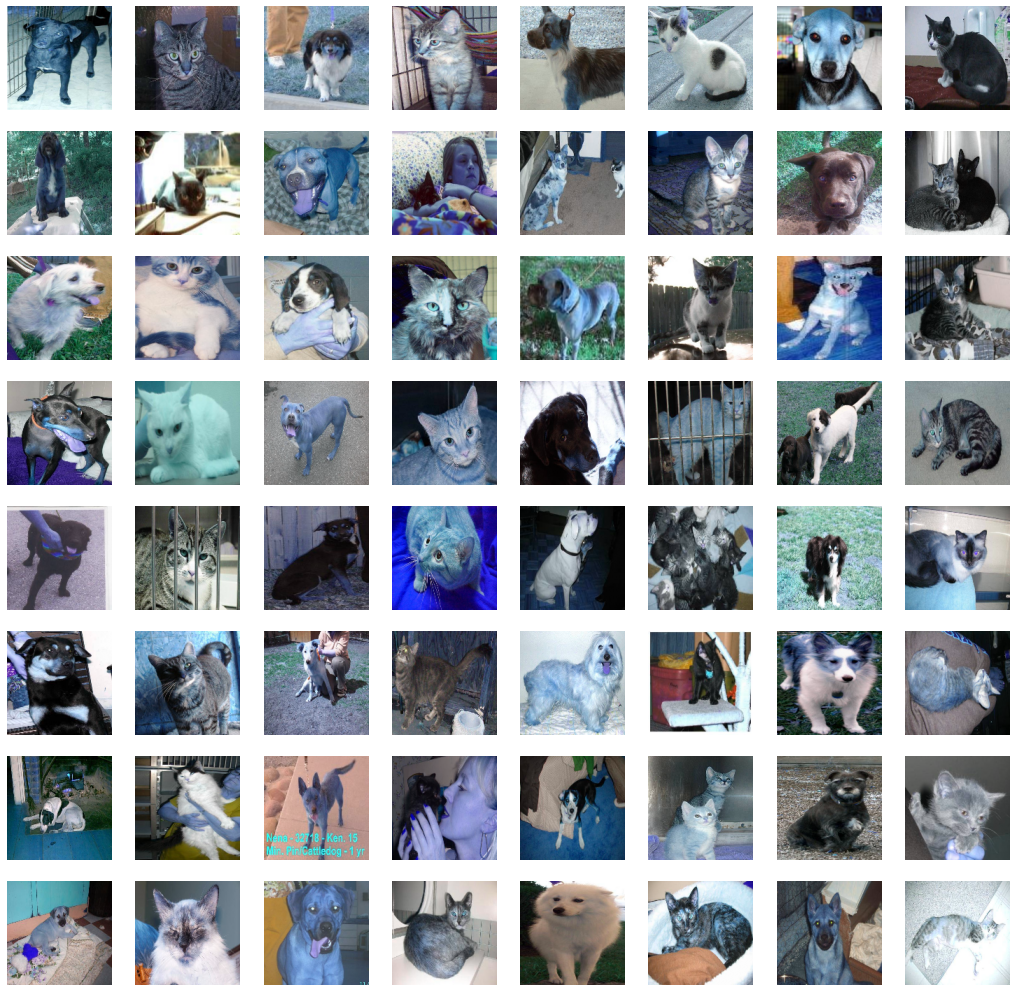

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8,8, figsize=(18,18))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(X_train[i*8+j])
        axs[i,j].axis('off')
plt.show()

Vamos a plantear el problema como clasificación binaria:

- **Clase 0**: gato
- **Clase 1**: perro

Construimos una red neuronal convolucional con tres capas de convolución acompañadas de `MaxPooling`. La función de coste será la **entropía cruzada**, pues estamos ante un problema de clasificación. Además, al ser un problema binario, la función de activación de la salida será una **sigmoide**.

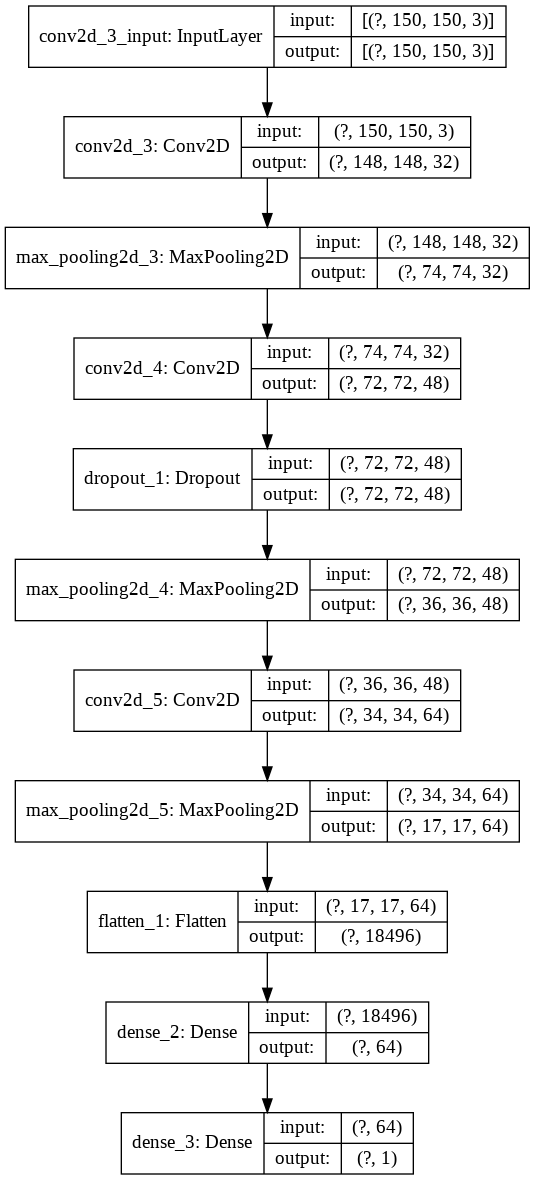

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',
              input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model
plot_model(create_model(), show_layer_names=True, show_shapes=True)

In [33]:
import matplotlib.pyplot as plt

def plot_train_val(history):
    plt.rcParams['figure.figsize'] = [15, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    
    ax1.plot(history.history['loss'], label='loss (train)')
    ax1.plot(history.history['val_loss'], label='loss (val)')
    ax1.set_title('Loss')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax2.plot(history.history['accuracy'], label='accuracy (train)')
    ax2.plot(history.history['val_accuracy'], label='accuracy (val)')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="lower right")
    ax1.grid()
    ax2.grid()
    plt.plot()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 48)        13872     
_________________________________________________________________
dropout (Dropout)            (None, 72, 72, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

TypeError: 'Text' object is not callable

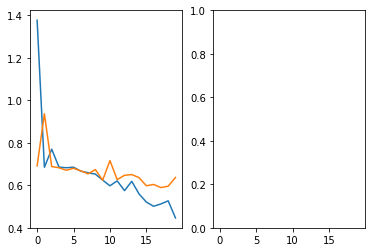

In [22]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()
    model_cnn.compile(
        loss='binary_crossentropy', 
        optimizer='rmsprop', metrics=['accuracy'])
    history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=20, batch_size=256, verbose=1)
plot_train_val(history)

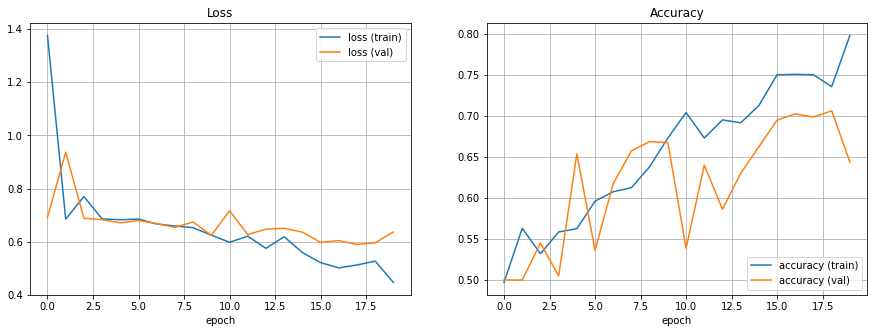

In [34]:
plot_train_val(history)

## Data generators

Uno de los principales problemas que tiene nuestro enfoque es que cargamos la información de **todas** las imágenes en memoria, ya que las vamos añadiendo a una lista de Python para luego generar un *Dataframe*. Este enfoque puede resultar suficiente para *datasets* pequeños que caben perfectamente en la memoria RAM. Cuando trabajamos con imágenes es muy probable que el *dataset* no quepa en la memoria, por lo que necesitamos algún mecanismo para cargar los datos *bajo demanda*.

En **Keras** tenemos disponible los generadores de datos (**data generators**) los cuales nos permiten no solo realizar la carga de los datos *bajo demanda*, sino que también nos va a permitir realizar **data augmentation en tiempo real** sobre los datos que se vayan a alimentar al modelo para su entrenamiento. De esta forma incorporaremos nuevas muestras sintéticas generadas a partir de las existentes que ayudarán a que el modelo **incremente su capadidad de generalización y reduzca su sobreajuste**.

En el caso del problema que tenemos entre manos, nos interesa realizar lo que se conoce como **Image Augmentation**: una técnica que consiste en aplicar diferentes transformaciones a las imágenes originales, lo que da lugar a múltiples copias transformadas de la misma imagen. Cada copia, sin embargo, es diferente de la otra en ciertos aspectos, dependiendo de las técnicas de aumento que se apliquen, como el desplazamiento, la rotación, el volteo, etc.

Por tanto, vamos a usar el **generador de datos** de **Keras** para el tratamiento de imágenes: [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Observando la documentación encontramos el listado de todas las transformaciones que podemos hacer sobre las imágenes:

- Rotaciones
- Desplazamientos
- Volteos
- Cambios en el brillo de la imagen
- Zoom
- Reescalado
- Efecto cizalla (*shear*)
- Etc.

En nuestro caso, vamos a aplicar un reescalado de los valores para dejarlo en el rango usual entre 0 y 1, rotaciones aleatorias de 40 grados, desplazamientos verticales y horizontales, volteo horizontal, *zooming* y *shearing*:

In [35]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'DogsCats/train'
validation_data_dir = 'DogsCats/validation'

datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1/255.0,
    horizontal_flip=True,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

Una vez definido el generador de datos, podemos usar su método `flow_from_directory` para crear los *datasets* a partir de las imágenes de un directorio. Las imágenes se cargarán en memoria **bajo demanda** y, además, se generarán **al vuelo** las nuevas imágenes con las transformaciones definidas en el `ImageDataGenerator`.

In [37]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=256,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=256,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Bien, hemos creado los iteradores para aumentar las imágenes. Pero, ¿cómo lo alimentamos a la red neuronal para que pueda hacer **data agumentation** sobre la marcha?

Para ello, todo lo que tenemos que hacer es alimentar el generador como entrada al método de Keras `fit()` aplicado en el modelo de red neuronal junto con epochs, batch_size, y otros argumentos importantes. Vamos a reutilizar la misma arquitectura de CNN que hemos usado antes, solo que ahora tenemos dos parámetros desconocidos: `steps_per_epochs` en entrenamiento, y `validation_steps` en validación.

Los parámetros `steps_per_epoch` y `validation_steps` proporcionan al proceso de aprendizaje la información necesaria para saber cuándo terminar un *epoch* y comenzar el siguiente. Normalmente deseamos que cada *epoch* procese todas las imágenes (de entrenamiento o de test) y para ello en cada *epoch* hay que proporcionar el número necesario de *steps*, teniendo en cuenta que en cada *step* se procesan `batch_size` imágenes. En definitiva, los valores que normalmente se asignan a los *steps* son: `num_train_samples // batch_size` y `num_validation_samples // batch_size`.

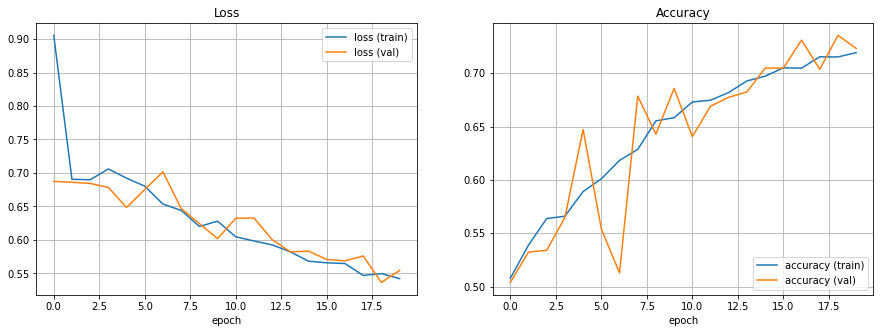

In [41]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()
    model_cnn.compile(
        loss='binary_crossentropy', 
        optimizer='rmsprop', metrics=['accuracy'])
    history_aug = model_cnn.fit(
        train_generator,
        steps_per_epoch=8000//256,
        validation_data=validation_generator,
        validation_steps=2000//256,
        epochs=20,
        verbose=0
    )
plot_train_val(history_aug)

Podemos observar cómo tenemos margen de mejora con respecto al número de *epochs*. También observamos que el overfitting se ha reducido y la tendencia en validación es similar a la tendencia en entrenamiento.

---

Creado por **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">